In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.grid_search import GridSearchCV 

from xgboost.sklearn import XGBRegressor

import dataset
import utils

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

sns.set_style('whitegrid')

plt.rcParams['figure.figsize'] = (18.0, 12.0)

/usr/local/anaconda3/envs/tera-abr2018/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/anaconda3/envs/tera-abr2018/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
agg = pd.read_csv("dataset/agg.csv.gz", encoding="utf-8", low_memory=False)
agg.head()

,AccidentID,Year,Month,Day,Hour,LightingCondition,Localisation,Intersection,AtmosphericCondition,CollisionType,Municipality,Address,GpsCoding,Latitude,Longitude,Department,DateTime,Date,Time,Minute,Weekdays,HolidayRange,Holiday,RoadCategory,RoadNumber,RouteNumber,RouteName,TrafficType,NumberofLanes,HomePRNumber,PRDistance,OuterLane,prof,LaneStructure,CentralLaneWidth,OuterLaneWidth,SurfaceCondition,Infrastructure,SituationofAccident,SchoolPoint,Users,UserCategory_1,UserCategory_2,UserCategory_3,UserCategory_4,Severity_1,Severity_2,Severity_3,Severity_4,Sex_1,Sex_2,Trip_0.0,Trip_1.0,Trip_2.0,Trip_3.0,Trip_4.0,Trip_5.0,Trip_9.0,SafetyEquipment_1.0,SafetyEquipment_2.0,SafetyEquipment_3.0,SafetyEquipment_10.0,SafetyEquipment_11.0,SafetyEquipment_12.0,SafetyEquipment_13.0,SafetyEquipment_20.0,SafetyEquipment_21.0,SafetyEquipment_22.0,SafetyEquipment_23.0,SafetyEquipment_30.0,SafetyEquipment_31.0,SafetyEquipment_32.0,SafetyEquipment_33.0,SafetyEquipment_40.0,SafetyEquipment_41.0,SafetyEquipment_42.0,SafetyEquipment_43.0,SafetyEquipment_90.0,SafetyEquipment_91.0,SafetyEquipment_92.0,SafetyEquipment_93.0,Vehicles
0,201600000001,16,2,1,14,1,2,1,8.0,3.0,5.0,"46, rue Sonneville",M,0.0,0,590,2016-02-01 14:45:00,2016-02-01,14:45:00,45,0,NaN,NaN,3.0,39,NaN,NaN,2.0,0.0,NaN,NaN,0.0,1.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0,2,2,0,0,0,1,0,1,0,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
1,201600000002,16,3,16,18,1,2,6,1.0,6.0,5.0,1a rue du cimetière,M,0.0,0,590,2016-03-16 18:00:00,2016-03-16,18:00:00,0,2,NaN,NaN,3.0,39,NaN,NaN,1.0,0.0,NaN,NaN,0.0,1.0,2.0,0.0,58.0,1.0,0.0,1.0,0.0,3,1,2,0,0,0,0,3,0,2,1,2,0,0,0,0,1,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,201600000003,16,7,13,19,1,1,1,1.0,6.0,11.0,NaN,M,0.0,0,590,2016-07-13 19:00:00,2016-07-13,19:00:00,0,2,-1.0,Bastille Day,3.0,1,NaN,NaN,2.0,2.0,NaN,NaN,0.0,1.0,3.0,0.0,68.0,2.0,0.0,3.0,99.0,2,1,0,1,0,1,0,1,0,2,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,201600000003,16,7,13,19,1,1,1,1.0,6.0,11.0,NaN,M,0.0,0,590,2016-07-13 19:00:00,2016-07-13,19:00:00,0,2,-1.0,Bastille Day,3.0,1,NaN,NaN,2.0,2.0,NaN,NaN,0.0,1.0,3.0,0.0,68.0,2.0,0.0,3.0,99.0,2,1,0,1,0,1,0,1,0,2,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,201600000003,16,7,13,19,1,1,1,1.0,6.0,11.0,NaN,M,0.0,0,590,2016-07-13 19:00:00,2016-07-13,19:00:00,0,2,-1.0,Bastille Day,3.0,1,NaN,NaN,2.0,2.0,NaN,NaN,0.0,1.0,3.0,0.0,68.0,2.0,0.0,3.0,99.0,2,1,0,1,0,1,0,1,0,2,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [3]:
agg.columns.values

array(['AccidentID', 'Year', 'Month', 'Day', 'Hour', 'LightingCondition',
       'Localisation', 'Intersection', 'AtmosphericCondition',
       'CollisionType', 'Municipality', 'Address', 'GpsCoding',
       'Latitude', 'Longitude', 'Department', 'DateTime', 'Date', 'Time',
       'Minute', 'Weekdays', 'HolidayRange', 'Holiday', 'RoadCategory',
       'RoadNumber', 'RouteNumber', 'RouteName', 'TrafficType',
       'NumberofLanes', 'HomePRNumber', 'PRDistance', 'OuterLane', 'prof',
       'LaneStructure', 'CentralLaneWidth', 'OuterLaneWidth',
       'SurfaceCondition', 'Infrastructure', 'SituationofAccident',
       'SchoolPoint', 'Users', 'UserCategory_1', 'UserCategory_2',
       'UserCategory_3', 'UserCategory_4', 'Severity_1', 'Severity_2',
       'Severity_3', 'Severity_4', 'Sex_1', 'Sex_2', 'Trip_0.0',
       'Trip_1.0', 'Trip_2.0', 'Trip_3.0', 'Trip_4.0', 'Trip_5.0',
       'Trip_9.0', 'SafetyEquipment_1.0', 'SafetyEquipment_2.0',
       'SafetyEquipment_3.0', 'SafetyEquipment_10

In [4]:
df = agg.loc[1:1000,:]
X_keep = [
    'Year','Month','Day','Weekdays','HolidayRange', 'RoadCategory', 
    'Users',
    'UserCategory_1', 'UserCategory_2', 'UserCategory_3', 'UserCategory_4', 
    'Sex_1', 'Sex_2',
    'Trip_0.0', 'Trip_1.0', 'Trip_2.0', 'Trip_3.0', 'Trip_4.0', 'Trip_5.0', 'Trip_9.0',
    'SafetyEquipment_1.0', 'SafetyEquipment_2.0','SafetyEquipment_3.0', 
    'SafetyEquipment_10.0','SafetyEquipment_11.0', 'SafetyEquipment_12.0','SafetyEquipment_13.0', 
    'SafetyEquipment_20.0','SafetyEquipment_21.0', 'SafetyEquipment_22.0','SafetyEquipment_23.0', 
    'SafetyEquipment_30.0','SafetyEquipment_31.0', 'SafetyEquipment_32.0','SafetyEquipment_33.0', 
    'SafetyEquipment_40.0','SafetyEquipment_41.0', 'SafetyEquipment_42.0','SafetyEquipment_43.0', 
    'SafetyEquipment_90.0','SafetyEquipment_91.0', 'SafetyEquipment_92.0','SafetyEquipment_93.0'
]

X = df[X_keep]
y = (df['Severity_2'] > 0) | (df['Severity_3'] > 0)

In [5]:
print(X.shape)
print(y.shape)

(1000, 43)
(1000,)


In [6]:
X.head()

,Year,Month,Day,Weekdays,HolidayRange,RoadCategory,Users,UserCategory_1,UserCategory_2,UserCategory_3,UserCategory_4,Sex_1,Sex_2,Trip_0.0,Trip_1.0,Trip_2.0,Trip_3.0,Trip_4.0,Trip_5.0,Trip_9.0,SafetyEquipment_1.0,SafetyEquipment_2.0,SafetyEquipment_3.0,SafetyEquipment_10.0,SafetyEquipment_11.0,SafetyEquipment_12.0,SafetyEquipment_13.0,SafetyEquipment_20.0,SafetyEquipment_21.0,SafetyEquipment_22.0,SafetyEquipment_23.0,SafetyEquipment_30.0,SafetyEquipment_31.0,SafetyEquipment_32.0,SafetyEquipment_33.0,SafetyEquipment_40.0,SafetyEquipment_41.0,SafetyEquipment_42.0,SafetyEquipment_43.0,SafetyEquipment_90.0,SafetyEquipment_91.0,SafetyEquipment_92.0,SafetyEquipment_93.0
1,16,3,16,2,NaN,3.0,3,1,2,0,0,2,1,2,0,0,0,0,1,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,16,7,13,2,-1.0,3.0,2,1,0,1,0,2,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,16,7,13,2,-1.0,3.0,2,1,0,1,0,2,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,16,7,13,2,-1.0,3.0,2,1,0,1,0,2,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,16,7,13,2,-1.0,3.0,2,1,0,1,0,2,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
y.head()

1    False
2    False
3    False
4    False
5    False
dtype: bool

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=28)

###  Correlações

In [28]:
corr = X.corr()

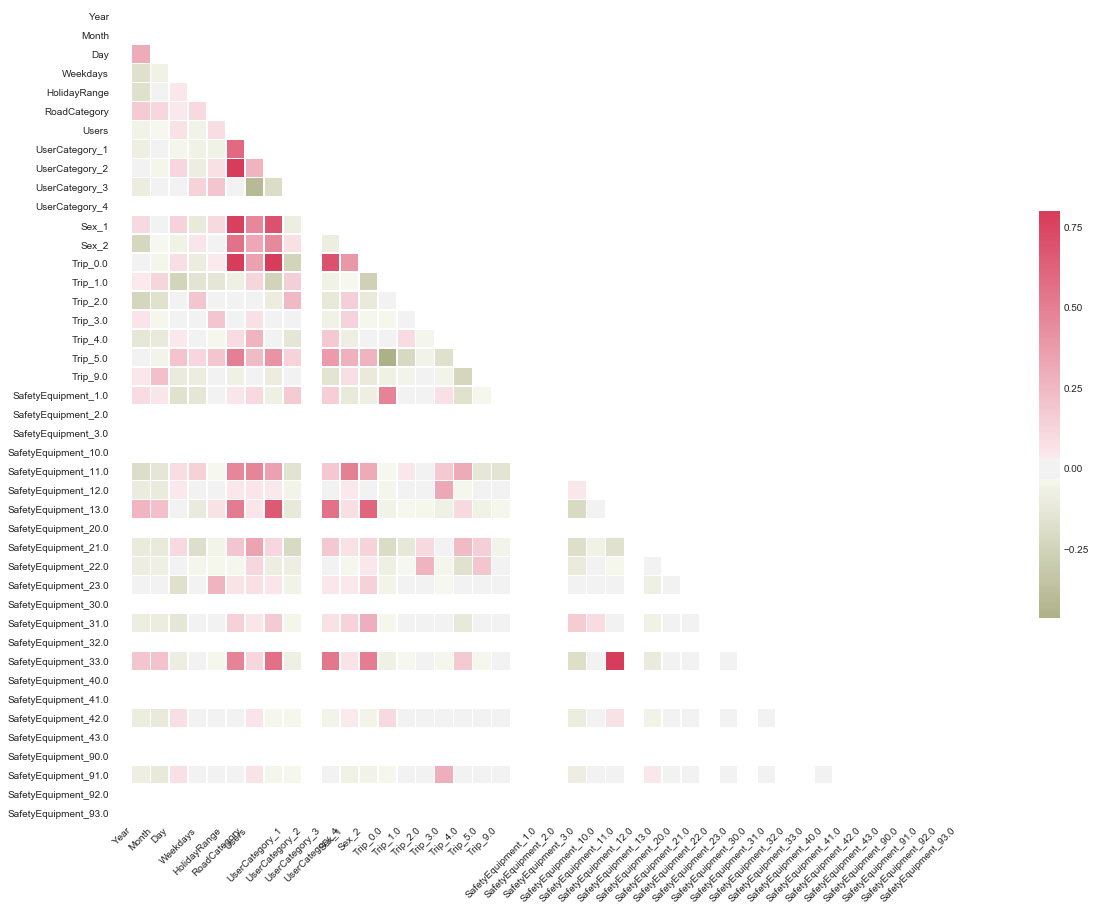

In [30]:
mascara = np.zeros_like(corr, dtype=np.bool)
mascara[np.triu_indices_from(mascara)] = True
f, ax = plt.subplots(figsize=(40, 15))
cmap = sns.diverging_palette(90, 5, as_cmap=True)
sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=.8, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=False)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.show()

### XGBoost

In [9]:
from xgboost.sklearn import XGBClassifier
from sklearn.grid_search import GridSearchCV   #Perforing grid search
from matplotlib.pylab import rcParams

In [10]:
model = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=5, min_child_weight=1, gamma=0,subsample=0.8,
                     colsample_bytree=0.8,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,random_state=28)

In [11]:
#Fit the algorithm on the data
model.fit(X_train, y_train,eval_metric='auc')

#Predict training set:
y_pred = model.predict(X_train)
y_pred_prob = model.predict_proba(X_train)[:,1]

print("Accuracy : %.4g" % metrics.accuracy_score(y_train.values, y_pred))
print("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, y_pred_prob))

Accuracy : 1
AUC Score (Train): 1.000000


/usr/local/anaconda3/envs/tera-abr2018/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Text(0,0.5,'Feature Importance Score')

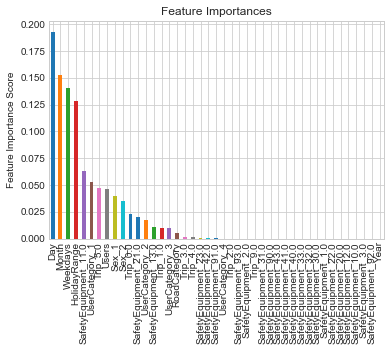

In [12]:
names = pd.Series(X_keep).to_dict()
feat_imp = pd.Series(model.feature_importances_).sort_values(ascending=False).rename(names)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

### GridSearchCV

In [13]:
param_test = {
 'max_depth': [2,4],
 'learning_rate':[0.1, 0.07]
}
gsearch = GridSearchCV(estimator = model, param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

In [14]:
gsearch.fit(X_train, y_train)
gsearch.grid_scores_, gsearch.best_params_, gsearch.best_score_

([mean: 0.97464, std: 0.01243, params: {'learning_rate': 0.1, 'max_depth': 2},
  mean: 0.97871, std: 0.01082, params: {'learning_rate': 0.1, 'max_depth': 4},
  mean: 0.97598, std: 0.01087, params: {'learning_rate': 0.07, 'max_depth': 2},
  mean: 0.98016, std: 0.01075, params: {'learning_rate': 0.07, 'max_depth': 4}],
 {'learning_rate': 0.07, 'max_depth': 4},
 0.9801616049038729)

Text(0,0.5,'Feature Importance Score')

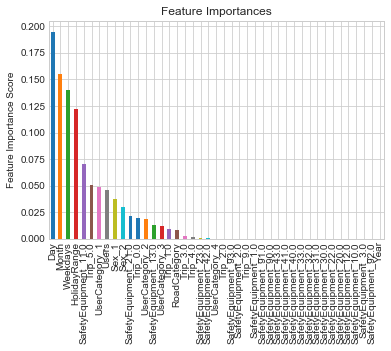

In [15]:
names = pd.Series(X_keep).to_dict()
feat_imp = pd.Series(gsearch.best_estimator_.feature_importances_).sort_values(ascending=False).rename(names)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')